<div style="text-align: left; font-size: 16px;">
    <div style="text-align: left; display: inline-block; line-height: 2;">
        <ul style="list-style-type: none; padding: 0;">
            <li>RMIT UNIVERSITY VIETNAM</li>
            <li>School of Science, Engineering and Technology (SSET)</li>
            <li>COSC2469 | COSC2722 – Algorithms and Analysis</li>
        </ul>
    </div>
</div>

<div style="text-align: center; font-size: 24px; margin-bottom: 5px; margin-top: 0px">
    <strong style="color: red;">Assessment 2: Group Project – Sudoku Solver</strong>
</div>

<div style="text-align: center; font-size: 20px; margin-bottom: -10px">
    <div style="text-align: center; display: inline-block; line-height: 2;">
        <ul style="list-style-type: none; padding: 0;">
            <li><strong>- Lecture:</strong> Dr. Tri Dang</li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                s3914633 - Tran Dong Nghi
            </li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                s4021263 - Chan Yong Park 
            </li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                s4061665 - Le Hung 
            </li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                s4104540 - Huynh Nguyen Minh Nhu	 
            </li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                s4054071 – Tran Hoang Nguyen
            </li>
            <li><strong>- Submission Due Date:</strong> 12.05.2025</li>
        </ul>
    </div>
</div>

<p style="text-align: center; font-size:16px; margin-left: 20px; line-height: 1.7; margin-top: -5px; margin-right: 30px;"><i>"I declare that in submitting all work for this assessment I have read, understood, and agree to the content and expectations of the <a href="https://www.rmit.edu.au/students/my-course/assessment-results/assessment" target="_blank">Assessment declaration</a>."</i></p>


# 1. IMPORT LIBRARY

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.ticker import MaxNLocator

# 2. IMPORT DATA

In [13]:
# Get the current working directory (where the notebook is located)
base_dir = Path(__file__).resolve().parent if '__file__' in globals() else Path().resolve()

# Go up two levels to reach the project root (from src/performance-analysis/)
project_root = base_dir.parent.parent

# Build the path to the CSV file using pathlib (cross-platform)
csv_path = project_root / "src" /"main" / "java" / "performance" / "sudokuIO" / "csvoutput.csv"

# Read the CSV file using pandas
raw_data = pd.read_csv(csv_path)

# 3. Dataset
## 3.1 Dataset Overview

In [14]:
print('\n____________ Dataset info ____________')
print(raw_data.info())              
print('\n____________ Some first data examples ____________')
print(raw_data.head(5)) 
print('\n____________ Statistics of numeric features ____________')
print(raw_data.describe())    
print('\n____________ Get specific rows and cols ____________')     
print(raw_data.iloc[[0,1,45], [2, 5]] ) # Refer using column ID


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sudoku ID         240 non-null    int64 
 1   Algorithm         240 non-null    object
 2   Level             240 non-null    object
 3   Status            240 non-null    object
 4   Time Taken (ms)   240 non-null    int64 
 5   Memory Used (KB)  240 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 11.4+ KB
None

____________ Some first data examples ____________
   Sudoku ID              Algorithm Level  Status  Time Taken (ms)  \
0          1          Dancing Links  EASY  Solved             3637   
1          1           Backtracking  EASY  Solved              318   
2          1       Forward Checking  EASY  Solved             2037   
3          1  Backtracking with MRV  EASY  Solved              436   
4          2          Dancing 

## 3.2 Explanation of Columns in the Dataset

1. **Sudoku ID**:  
    - Represents the unique identifier for each Sudoku puzzle in the dataset.  
    - Used to distinguish between different Sudoku puzzles.

2. **Algorithm**:  
    - Indicates the algorithm used to solve the Sudoku puzzle.  
    - Examples include "Backtracking", "Dancing Links", "Forward Checking", and "Backtracking with MRV".

3. **Level**:  
    - Represents the difficulty level of the Sudoku puzzle.  
    - Common levels include "EASY", "MEDIUM", "HARD", and "EVIL".

4. **Status**:  
    - Indicates whether the Sudoku puzzle was successfully solved or not.  
    - Possible values include "Solved" or "Unsolved".

5. **Time Taken (ms)**:  
    - The time taken by the algorithm to solve the Sudoku puzzle, measured in milliseconds.  
    - Helps in comparing the efficiency of different algorithms.

6. **Memory Used (bytes)**:  
    - The amount of memory consumed by the algorithm while solving the Sudoku puzzle, measured in bytes.  
    - Useful for analyzing the memory efficiency of the algorithms.

# 4. Visualization
## 4.1 Average Time Taken Visualization

Level                  EASY  MEDIUM  HARD  EVIL
Algorithm                                      
Backtracking            253     299 1,043 3,432
Backtracking with MRV   313     342   574 1,051
Dancing Links           996     813   831   796
Forward Checking        755     686 1,318 2,114


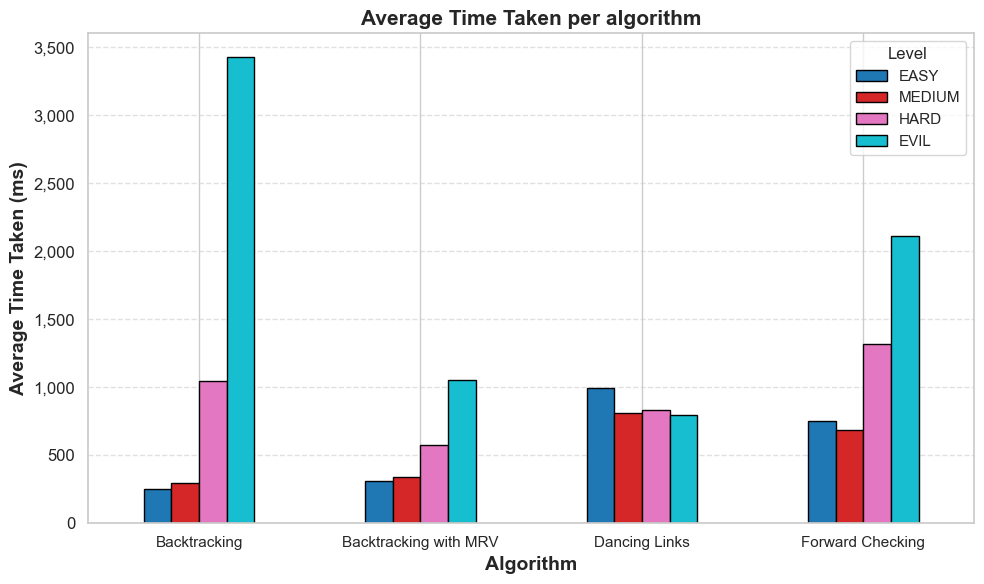

In [15]:
# Calculate the average time taken by each algorithm for different levels
avg_time_per_algorithm_level = raw_data.groupby(['Algorithm', 'Level'])['Time Taken (ms)'].mean().unstack()
desired_order = ['EASY', 'MEDIUM', 'HARD', 'EVIL']
avg_time_per_algorithm_level = avg_time_per_algorithm_level[desired_order]
# Print the result
print(avg_time_per_algorithm_level)

# Set the plot style for better appearance
sns.set(style="whitegrid")

# --- Plot for the main three algorithms ---
avg_time_per_algorithm_level.plot(kind='bar', figsize=(10, 6), colormap='tab10', edgecolor='black')
plt.title('Average Time Taken per algorithm', fontsize=15, weight='bold')
plt.xlabel('Algorithm', fontsize=14, weight='bold')
plt.ylabel('Average Time Taken (ms)', fontsize=14, weight='bold')
plt.xticks(rotation=0, ha='center', fontsize=11)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('visualization_outputs/average_time_taken_algorithms.png', dpi=300)
plt.show()

## 4.2 Average Memory Taken Visualization

C:\Users\conhe\AppData\Local\Temp\ipykernel_23492\391652372.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_memory_per_algorithm = raw_data.groupby(['Algorithm', 'Level'])['Memory Used (KB)'].mean().unstack()


Level                  EASY  MEDIUM  HARD  EVIL
Algorithm                                      
Backtracking             25       2     2     2
Backtracking with MRV    77      84    83   123
Dancing Links           375     331   331   331
Forward Checking        574     800 1,295 2,106


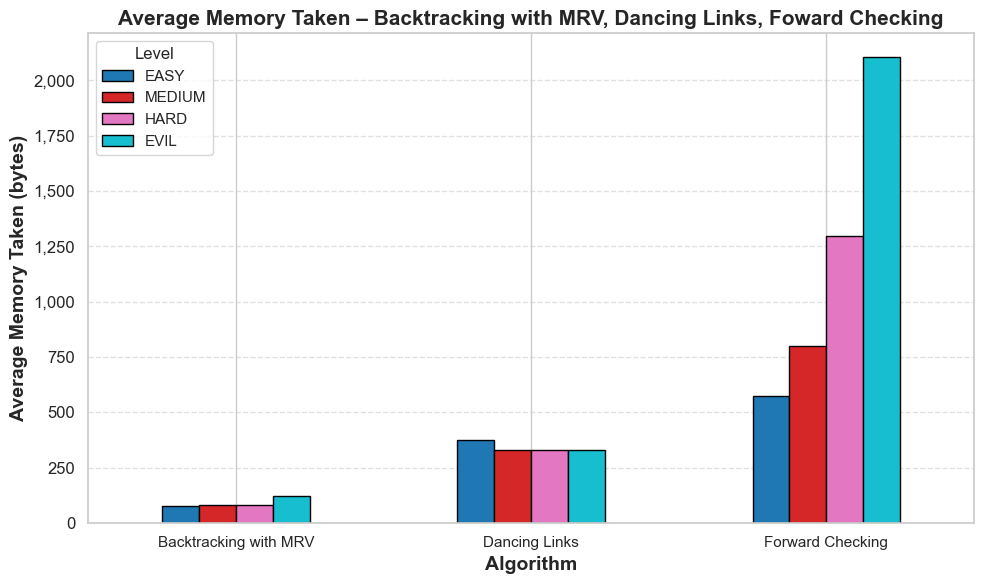

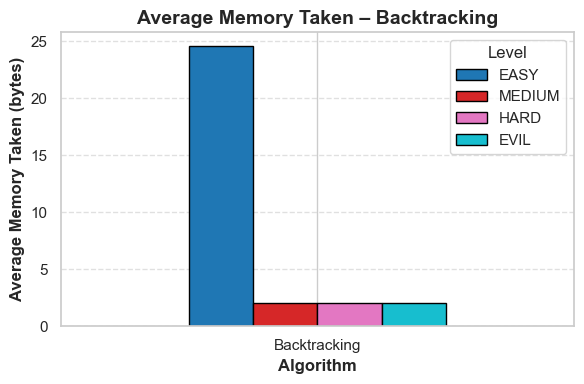

In [21]:
# Set pandas to display float numbers in non-scientific notation
pd.options.display.float_format = '{:,.0f}'.format

# Calculate the average memory usage per algorithm
avg_memory_per_algorithm = raw_data.groupby(['Algorithm', 'Level'])['Memory Used (KB)'].mean().unstack()
desired_order = ['EASY', 'MEDIUM', 'HARD', 'EVIL']
avg_memory_per_algorithm = avg_memory_per_algorithm[desired_order]

# Print the average memory usage with regular formatting
print(avg_memory_per_algorithm)

# Set the plot style for better appearance
sns.set(style="whitegrid")

# Split the DataFrame into two parts
# Separate "Backtracking" and keep the other three algorithms
bt_df = avg_memory_per_algorithm.loc[avg_memory_per_algorithm.index == "Backtracking"]
other_df = avg_memory_per_algorithm.loc[avg_memory_per_algorithm.index != "Backtracking"]

# --- Plot for the main three algorithms ---
other_df.plot(kind='bar', figsize=(10, 6), colormap='tab10', edgecolor='black')
plt.title('Average Memory Taken – Backtracking with MRV, Dancing Links, Foward Checking', fontsize=15, weight='bold')
plt.xlabel('Algorithm', fontsize=14, weight='bold')
plt.ylabel('Average Memory Taken (bytes)', fontsize=14, weight='bold')
plt.xticks(rotation=0, ha='center', fontsize=11)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('visualization_outputs/average_memory_taken_algorithms_part1.png', dpi=300)
plt.show()

# --- Plot for Backtracking only ---
bt_df.plot(kind='bar', figsize=(6, 4), colormap='tab10', edgecolor='black')
plt.title('Average Memory Taken – Backtracking', fontsize=14, weight='bold')
plt.xlabel('Algorithm', fontsize=12, weight='bold')
plt.ylabel('Average Memory Taken (bytes)', fontsize=12, weight='bold')
plt.xticks(rotation=0, ha='center', fontsize=11)
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('visualization_outputs/average_memory_taken_algorithms_part2.png', dpi=300)
plt.show()

## 4.3 Correctness Comparision Visualization

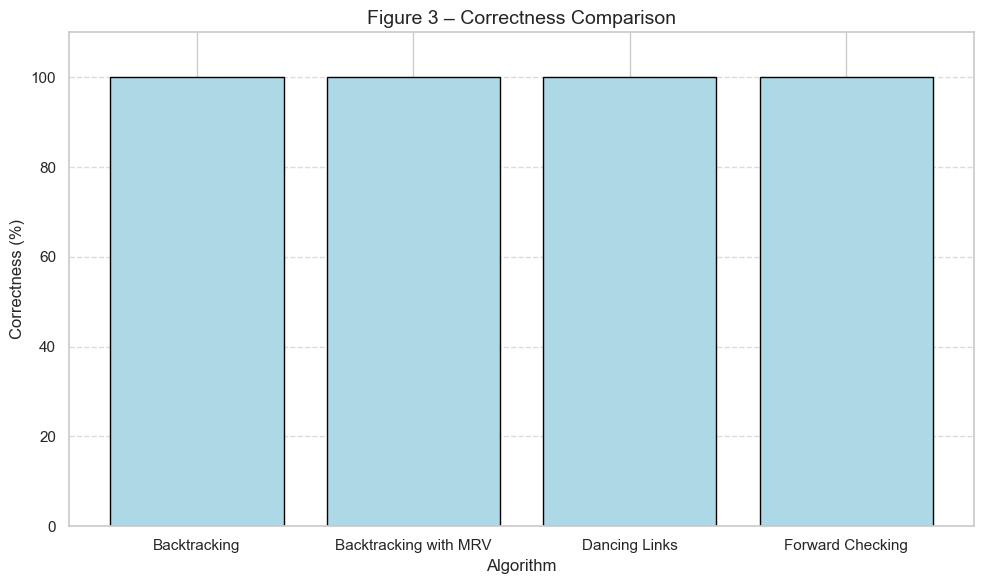

In [17]:
# Data for the Bar chart
correctness_series = raw_data.groupby('Algorithm')['Status'].apply(lambda x: (x == 'Solved').mean() * 100)
algorithms = correctness_series.index.tolist()
correctness = correctness_series.values.tolist()

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, correctness, color='lightblue', edgecolor='black')
plt.title('Figure 3 – Correctness Comparison', fontsize=14)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Correctness (%)', fontsize=12)
plt.ylim(0, 110)  # Set limit to make the chart look a little more interesting
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot to the 'visualization_output' folder
output_path = 'visualization_outputs/correctness_comparison.png'
plt.savefig(output_path, dpi=300)

# Show the plot
plt.show()

## 4.4 Time Distribution per Algorithm Visualization

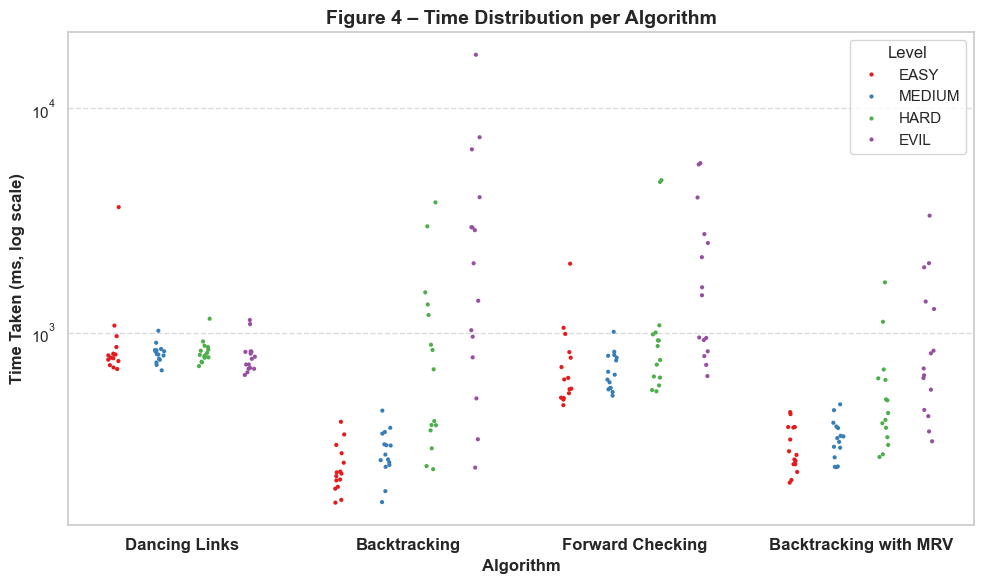

In [18]:
# Define the desired order of levels
desired_order = ['EASY', 'MEDIUM', 'HARD', 'EVIL']

# Reorder the 'Level' column in raw_data
raw_data['Level'] = pd.Categorical(raw_data['Level'], categories=desired_order, ordered=True)

# Create the strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=raw_data,
    x='Algorithm',               # Group by Algorithm
    y='Time Taken (ms)',         # Plot Time Taken
    hue='Level',                 # Add color differentiation for Level
    palette='Set1',              # Clear color palette
    size=3,
    jitter=True,
    dodge=True,                  # Separate each level's data
    legend=True
)
plt.yscale('log')               # Log scale for better time distribution visualization
plt.title('Figure 4 – Time Distribution per Algorithm', fontsize=14, weight='bold')
plt.xlabel('Algorithm', weight='bold')
plt.ylabel('Time Taken (ms, log scale)', weight='bold')
plt.xticks(rotation=0, ha='center', fontsize=12, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('visualization_outputs/time_distribution_per_algorithm.png', dpi=300)
plt.show()


## 4.5 Correlation Metrix between Time and Space of Algorithms
### 4.5.1 Data Processing"

In [22]:
# Convert DataFrame to a list of dictionaries
raw_data_dictionary = raw_data.to_dict(orient='records')

# Map full names to short keys
name_mapping = {
    "Dancing Links": "DLX",
    "Backtracking": "Backtracking",
    "Forward Checking": "FWC",
    "Backtracking with MRV": "Backtrack_with_MRV"
}

# Initialize arrays dictionary using short keys
arrays = {f"{short}_Time": [] for short in name_mapping.values()}
arrays.update({f"{short}_Memory": [] for short in name_mapping.values()})

# Fill arrays
for entry in raw_data_dictionary:
    algorithm = entry["Algorithm"]
    time_taken = entry["Time Taken (ms)"]
    memory_used = entry["Memory Used (KB)"]
    
    # Check if the algorithm exists in the name_mapping
    if algorithm in name_mapping:
        short_key = name_mapping[algorithm]
        arrays[f"{short_key}_Time"].append(time_taken)
        arrays[f"{short_key}_Memory"].append(memory_used)
    else:
        print(f"Warning: Algorithm '{algorithm}' not found in the mapping.")

### 4.5.2 Visualization

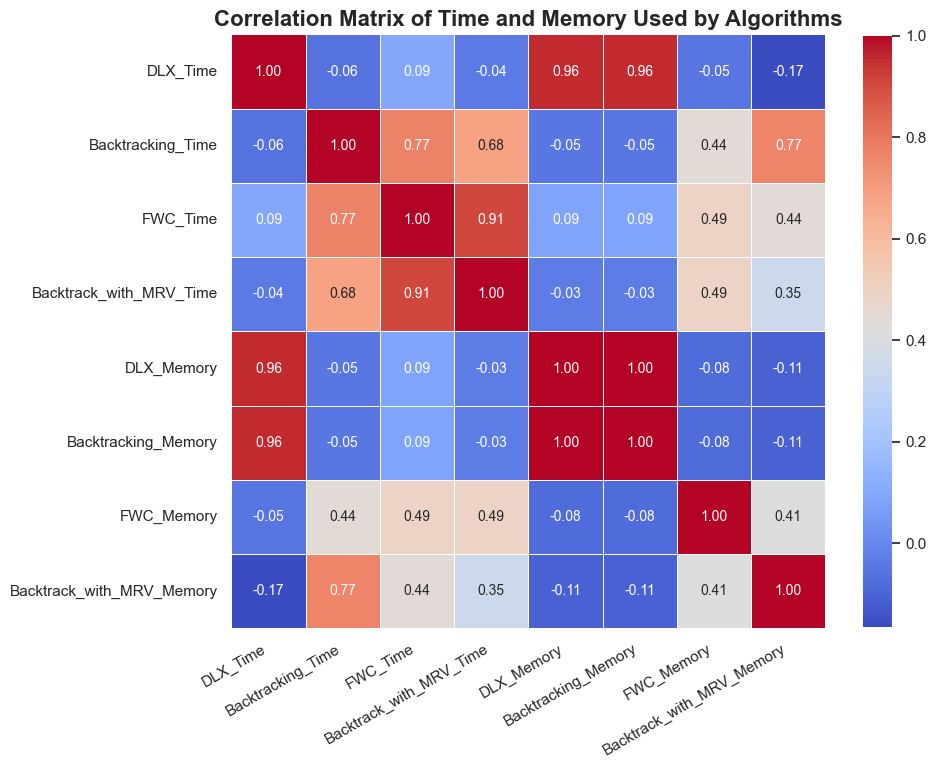

In [23]:
# Create a DataFrame from the arrays
df_for_correlation = pd.DataFrame(arrays)

# Replace inf and NaN values if any
df_for_correlation = df_for_correlation.replace([np.inf, -np.inf], np.nan)

# Drop rows containing NaN values if any
df_for_correlation = df_for_correlation.dropna()

# Compute the correlation matrix
corr_matrix = df_for_correlation.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))  

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True, 
    cbar_kws={"shrink": 0.97},
    annot_kws={"size": 10}    
)

# Apply custom layout adjustments (optional)
plt.title("Correlation Matrix of Time and Memory Used by Algorithms", weight="bold", fontsize=16)

# Adjust spacing manually before saving
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)
# Apply layout fix
plt.tight_layout()

# Save the plot after layout adjustment
plt.savefig('visualization_outputs/correlation_matrix_of_time_and_memory.png', dpi=300)

# Show the plot
plt.show()
